I will be using many different ML models to classify digits

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
digits = load_digits()

Here I'll do some exploratory analysis of the dataset. This analysis is exactly the same as what I did for the SVM exercise

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['Target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Now I'll create the training and testing datasets for each model to work with.

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop(['Target'], axis = 'columns')
y = df.Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

The first model I'll be using is logistic classification. I'll use GridSearch to find the optimal parameters.

In [8]:
from sklearn.linear_model import LogisticRegression
logiClf = LogisticRegression(max_iter=10000)
logiClf.fit(x_train, y_train)
logiClf.score(x_test, y_test)

0.9666666666666667

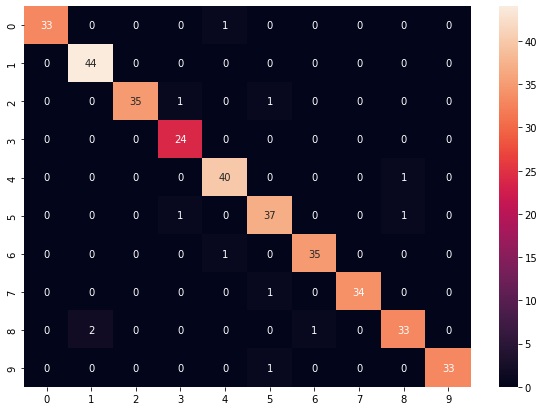

In [9]:
logiPred = logiClf.predict(x_test)
logiCM = confusion_matrix(logiPred, y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(logiCM, annot=True)

Second, I'll use a SVM

In [10]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9916666666666667

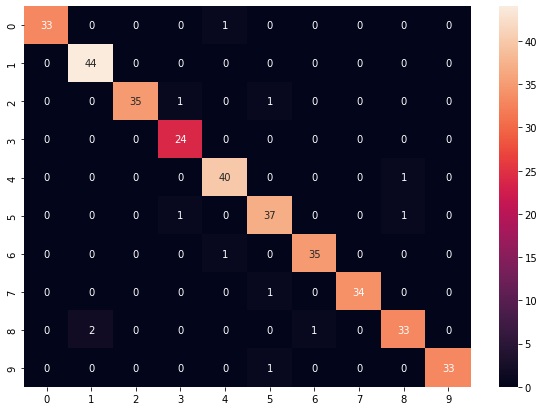

In [11]:
svmPred = svm.predict(x_test)
svmCM = confusion_matrix(logiPred, y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(svmCM, annot=True)

Third, a random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9861111111111112

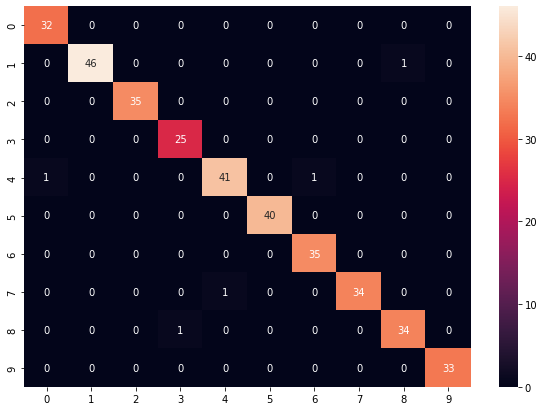

In [13]:
rfcPred = rfc.predict(x_test)
rfcCM = confusion_matrix(rfcPred, y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(rfcCM, annot=True)

Finally, I'll use a neural network. We didn't cover this in class but I want to research it.

In [14]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(x_train, y_train)
nn.score(x_test, y_test)

0.9805555555555555

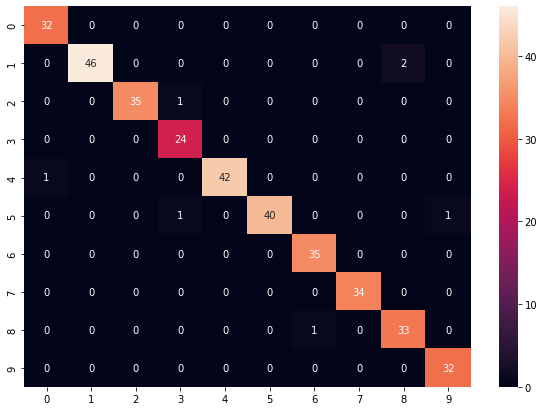

In [15]:
nnPred = nn.predict(x_test)
nnCM = confusion_matrix(nnPred, y_test)
plt.figure(figsize=(10, 7))
sns.heatmap(nnCM, annot=True)